In [1]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Создание DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

In [4]:
# Просмотр первых нескольких строк данных
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Базовая статистика
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


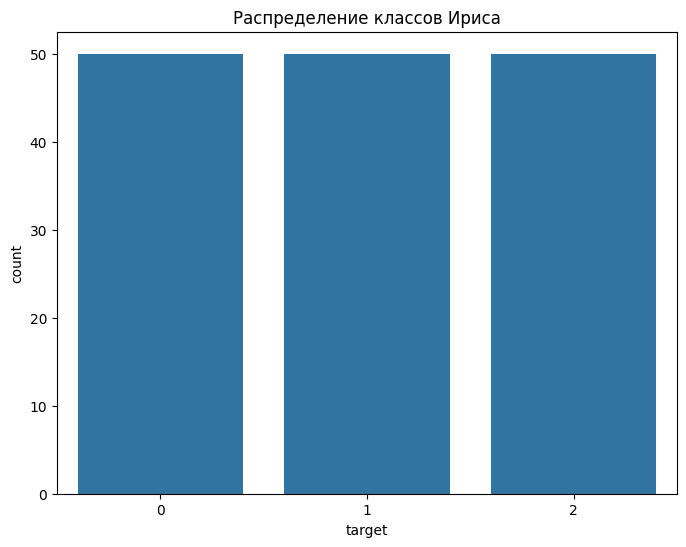

In [6]:
# Визуализация распределения классов
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Распределение классов Ириса')
plt.show()


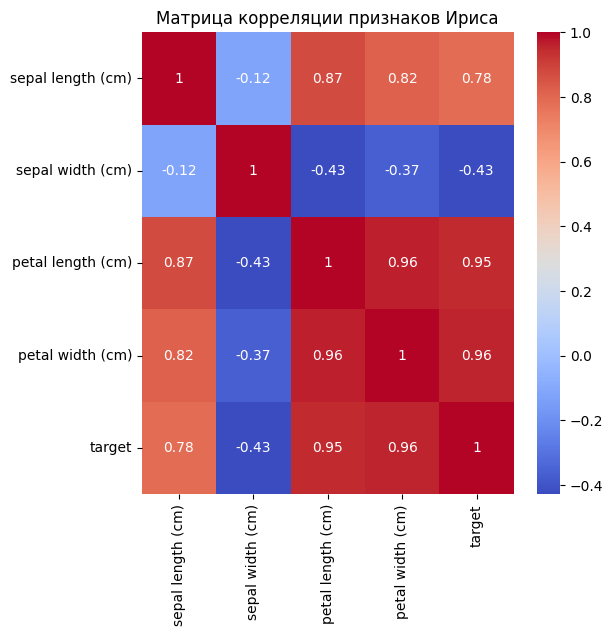

In [7]:
# Матрица корреляции
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляции признаков Ириса')
plt.show()


In [8]:
# Разделение на обучающую и тестовую выборки
test_size = 0.2
val_size = 0.2
random_state = 42

df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df["target"])
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('target', axis=1), df_train['target'], test_size=val_size, random_state=random_state, stratify=df_train["target"])
X_test, y_test = df_test.drop('target', axis=1), df_test['target']

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (96, 4)
X_val shape: (24, 4)
X_test shape: (30, 4)


In [9]:
# Создание и обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
# Предсказание на валидационной выборке
y_pred = model.predict(X_val)

# Оценка модели
accuracy = accuracy_score(y_val, y_pred)
print(f'Точность модели: {accuracy:.2f}')

# Подробный отчет о классификации
print('\nОтчет о классификации:')
print(classification_report(y_val, y_pred, target_names=iris.target_names))

Точность модели: 0.96

Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.88      0.93         8
   virginica       0.89      1.00      0.94         8

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



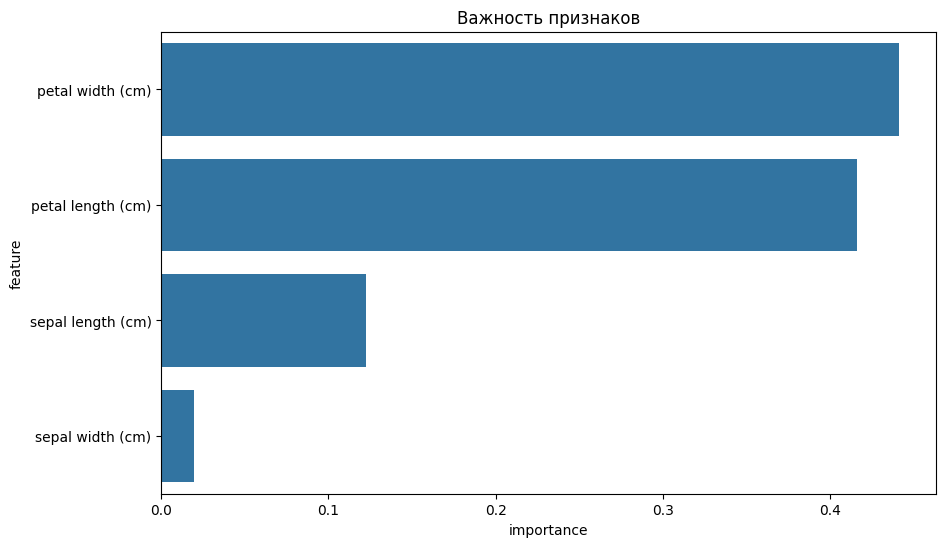

In [11]:
# Важность признаков
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Важность признаков')
plt.show()

In [13]:
# Сохранение модели
import os
import joblib


model_name = "random_forest"
model_ext = ".joblib"
model_path = os.path.join("..", "models", f'{model_name}{model_ext}')

joblib.dump(model, model_path)

print(f"Модель сохранена: {model_path}")

Модель сохранена: ../models/random_forest.joblib


In [14]:
# Загрузка модели
model = joblib.load(model_path)
print("Модель загружена")

print("Предсказание на тестовой выборке")
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')


Модель загружена
Предсказание на тестовой выборке
Точность модели: 0.96
